<h1>EDA - Análisis de Datos Exploratorio</h1>

In [18]:
profile = ProfileReport(df_train, title="Cirrosis: Predicción de Supervivencia del Paciente")
# profile.to_file("../data/cirrhosis_profile.html")

In [19]:
TARGET = "Status"

def split_features(df, target):
    unique_values = df.nunique().drop(target)
    
    cat_features = unique_values[unique_values < 5].index.tolist()
    num_features = unique_values[unique_values >= 5].index.tolist()

    return unique_values, cat_features, num_features

unique_values, CAT_FEATURES, NUM_FEATURES = split_features(df_train, TARGET)

print(f"Target: {TARGET}\n")
print(f"Número de valores posibles por cada feature:\n {unique_values}\n")
print(f"Features categóricas: {CAT_FEATURES}\n")
print(f"Features númericas: {NUM_FEATURES}\n")

Target: Status

Número de valores posibles por cada feature:
 id               7905
N_Days            461
Drug                2
Age               391
Sex                 2
Ascites             2
Hepatomegaly        2
Spiders             2
Edema               3
Bilirubin         111
Cholesterol       226
Albumin           160
Copper            171
Alk_Phos          364
SGOT              206
Tryglicerides     154
Platelets         227
Prothrombin        49
Stage               4
dtype: int64

Features categóricas: ['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Stage']

Features númericas: ['id', 'N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']



<h4>Distribución features <b>categóricas</b></h4>

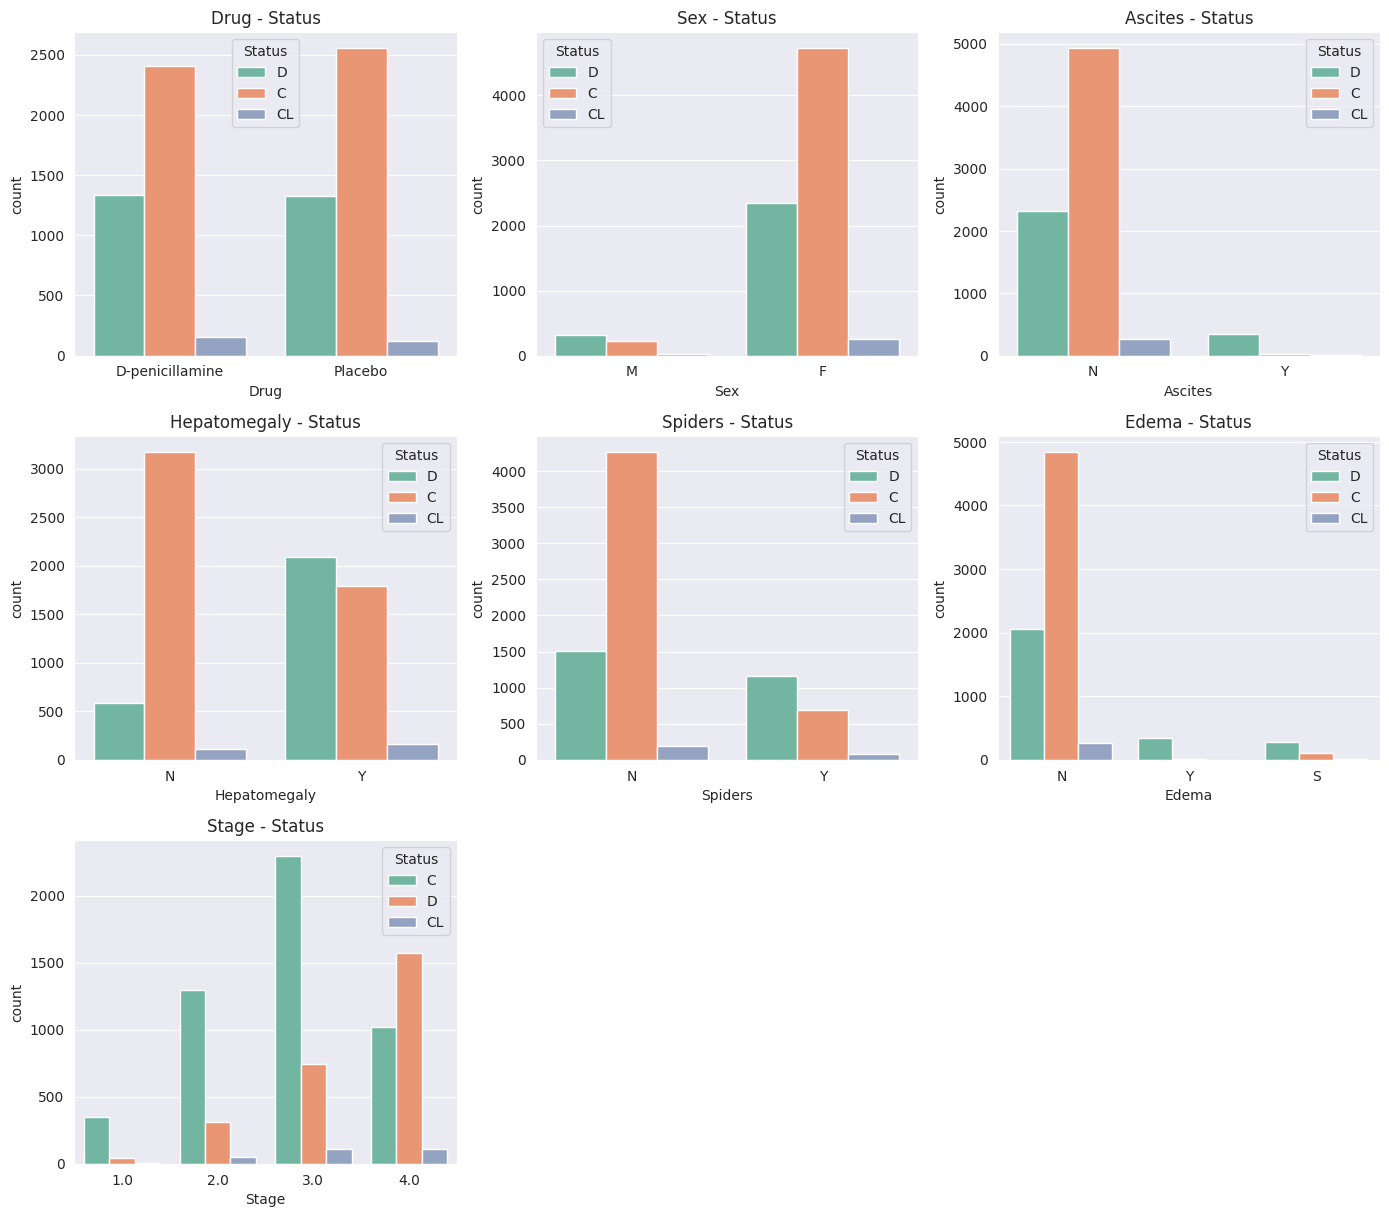

In [20]:
def categories_countplot(data, features, target):
    rows = len(features)
    cols = 3
    total = rows * cols
    
    plt.figure(figsize=(14, rows * 4))
    for i, col in enumerate(features):
        plt.subplot(rows, cols, i % total + 1)
        sns.countplot(x=col, hue=target, data=data)
        plt.title(f"{col} - {target}")
        
    plt.tight_layout()
    plt.show()

categories_countplot(df_train, CAT_FEATURES, TARGET)

<h4>Distribución features <b>númericas</b></h4>

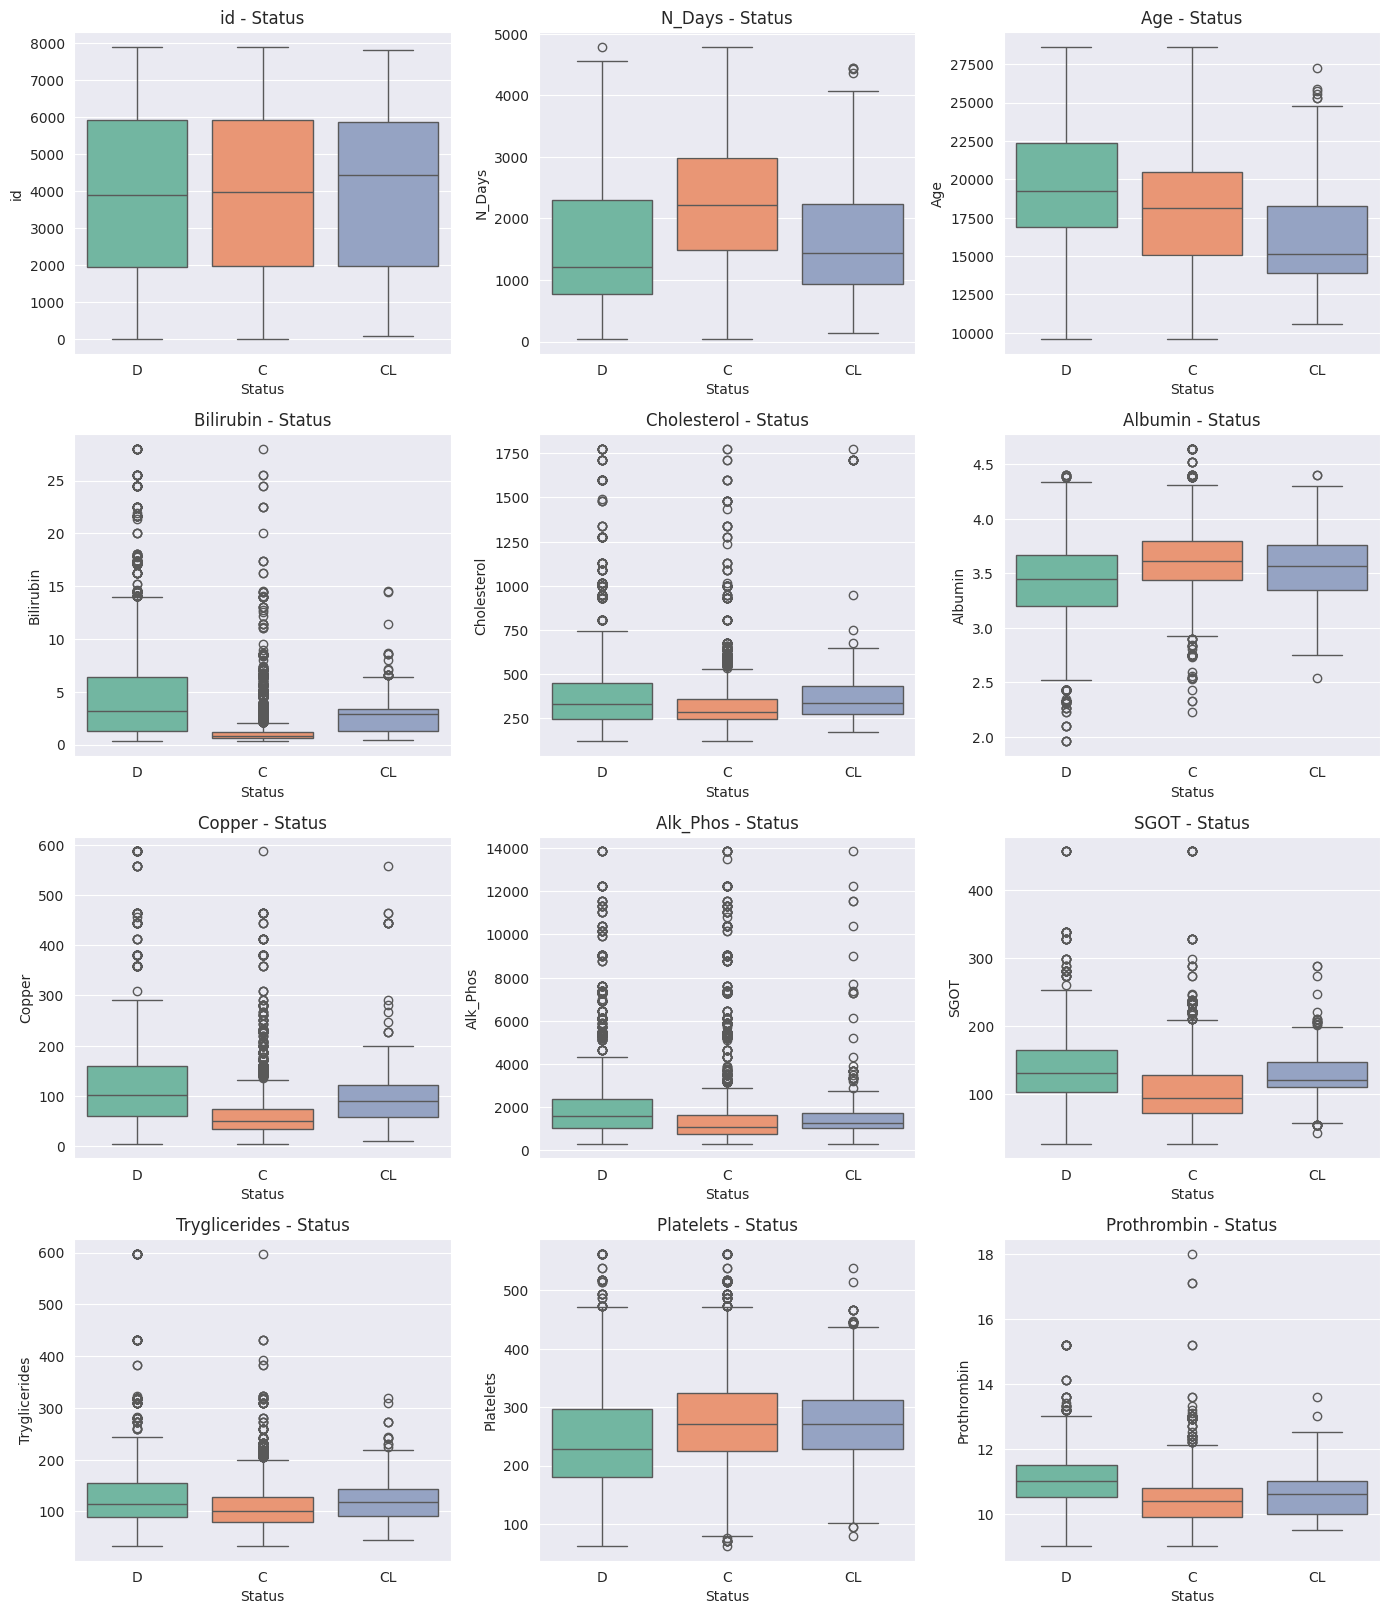

In [21]:
def numerical_boxplot(data, features, target):
    rows = len(features)
    cols = 3
    total = rows * cols
    
    plt.figure(figsize=(14, rows * 4))
    for i, col in enumerate(features):
        plt.subplot(rows, cols, i % total + 1)
        sns.boxplot(x=target, y=col, hue=target, data=data)
        plt.title(f"{col} - {target}")
        
    plt.tight_layout()
    plt.show()

numerical_boxplot(df_train, NUM_FEATURES, TARGET)

<h4>Correlación features <b>númericas</b></h4>

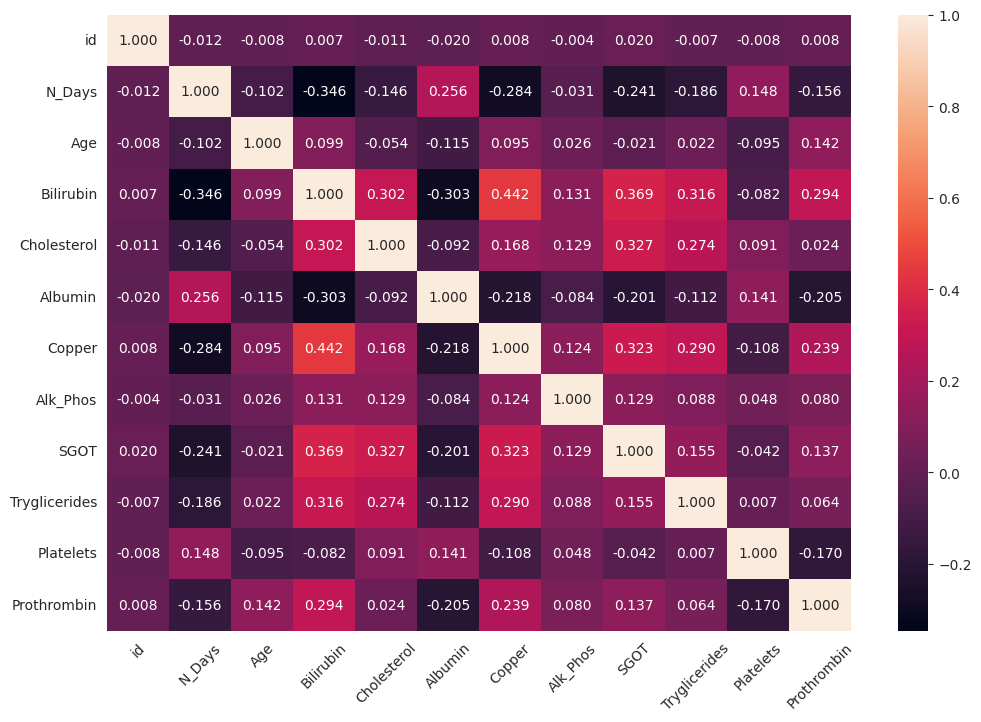

In [22]:
df_corr_num = df_train[NUM_FEATURES].corr()

plt.figure(figsize=(12,8))
sns.heatmap(df_corr_num, annot=True, fmt=".3f")
plt.xticks(rotation=45)
plt.show()

Podemos observar que **NO** existe una correlación alta entre las features numéricas. La más alta la encontramos entre Bilirrubina y Cobre, con un valor de 0.4.